# Lead Titanate (PTO) domain wall junction data analysis walk-through

The data from this notebook is published in:

Kalani Moore, Michele Conroy, Eoghan N. O'Connell, Charlotte Cochard, Jennifer
Mackel, Alan Harvey, Thomas E. Hooper, Andrew J. Bell, J. Marty Gregg, Ursel
Bangert, Highly Charged 180° Head-to-Head Domain Walls in PbTiO3, Nature
Communications Physics, 2020.

If you are using this notebook with Binder, it may fail due to a memory error! You can run it locally instead!

In [1]:
# choose your matplotlib backend. qt will plot in a separate window.
# %matplotlib notebook

import matplotlib.pyplot as plt
import temul.api as tml
import atomap.api as am
import hyperspy.api as hs
import numpy as np
import os

if "data" not in os.path.abspath(''):
    path_to_data = os.path.join(os.path.abspath(''), "data")
    os.chdir(path_to_data)


<IPython.core.display.Javascript object>


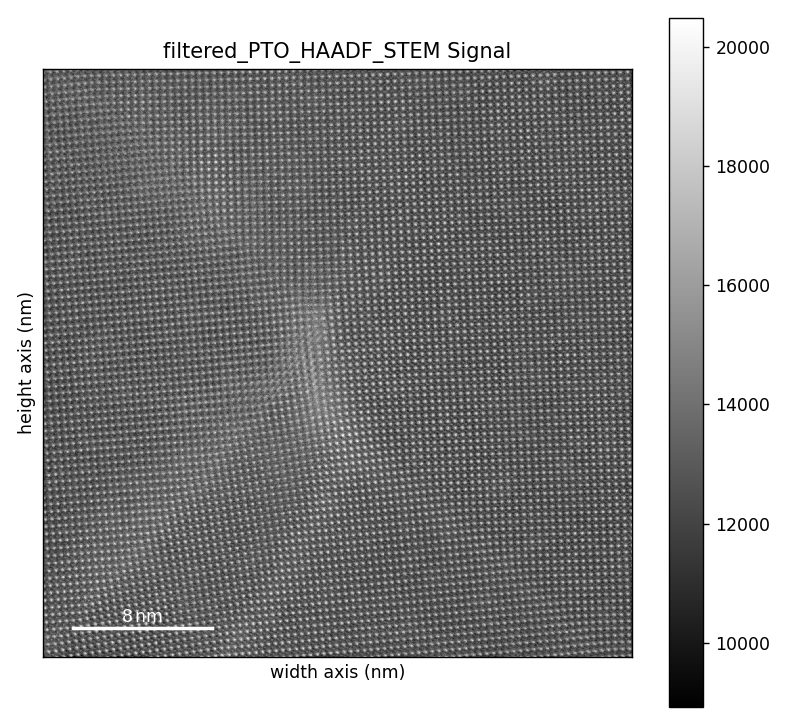

In [3]:
# Open the original PTO Junction dataset

image = hs.load("filtered_PTO_HAADF_STEM.hspy")
sampling = image.axes_manager[-1].scale  # nm/pix
units = image.axes_manager[-1].units
image.plot()

In [4]:
# Open the pre-made PTO atom lattice. This may take a while.

atom_lattice = am.load_atom_lattice_from_hdf5("Atom_Lattice.hdf5", False)
sublattice1 = atom_lattice.sublattice_list[0]  # Pb Sublattice
sublattice2 = atom_lattice.sublattice_list[1]  # Ti Sublattice
sublattice1.construct_zone_axes(atom_plane_tolerance=1)


In [5]:
# Set up parameters for plotting the strain, rotation, and c/a ratio maps:
zone_vector_index_A = 0
zone_vector_index_B = 1
# Note that sometimes the 0 and 1 axes are constructed first or second, so you may have to swap them.

filename = None  # Set to a string if you want to save the map

## Structure Mapping

You can use return_x_y_z=True to get the x,y, and strain/rotation/ratio
values also!
Check the documentation here: temul-toolkit.readthedocs.io


### Prepare the line profile positions

Plot the line profiles with temul.signal_plotting functions
You can also choose your own line_profile_positions with
am.add_atoms_with_gui(image) and use the skimage.profile_line for
customisability.


In [6]:
line_profile_positions = np.load('line_profile_positions.npy')
# line_profile_positions = tmlplot.choose_points_on_image(image) #  manual

### Strain Map

In [7]:
# We want to see the strain map of the Pb Sublattice in the y-axis direction

vmin = -15
vmax = 30
cmap = 'inferno'
theoretical_value = round(3.929/10, 3)  # units of nm

strain_map = tml.get_strain_map(sublattice1, zone_vector_index_A,
                                 theoretical_value, sampling=sampling,
                                 units=units, vmin=vmin, vmax=vmax, cmap=cmap)


<IPython.core.display.Javascript object>


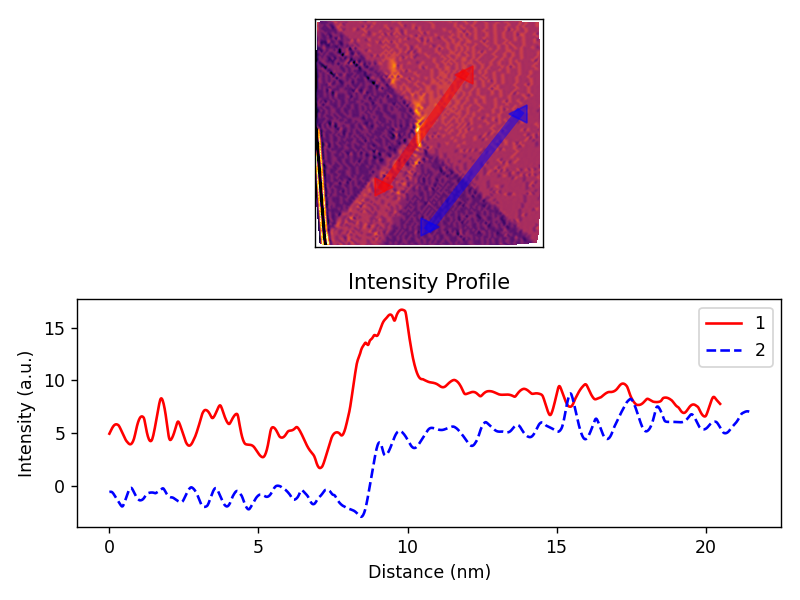

In [8]:
kwargs = {'vmin': vmin, 'vmax': vmax, 'cmap': cmap}

tml.compare_images_line_profile_one_image(strain_map, line_profile_positions,
                                      linewidth=100, arrow='h', linetrace=0.05,
                                      **kwargs)


### Rotation Map

In [9]:
# Now plot the rotation map of the Pb Sublattice in the x-axis direction to see
# the turning of the lattice across the junction.

vmin = -5
vmax = 15
cmap = 'inferno'
angle_offset = -2  # degrees


In [10]:
# Now plot the rotation map of the Pb Sublattice in the x-axis direction to see
# the turning of the lattice across the junction.

vmin = -5
vmax = 15
cmap = 'inferno'
angle_offset = -2  # degrees

rotation_map = tml.rotation_of_atom_planes(
                    sublattice1, zone_vector_index_B,
                    angle_offset, degrees=True, sampling=sampling, units=units,
                    vmin=vmin, vmax=vmax, cmap=cmap)


<IPython.core.display.Javascript object>


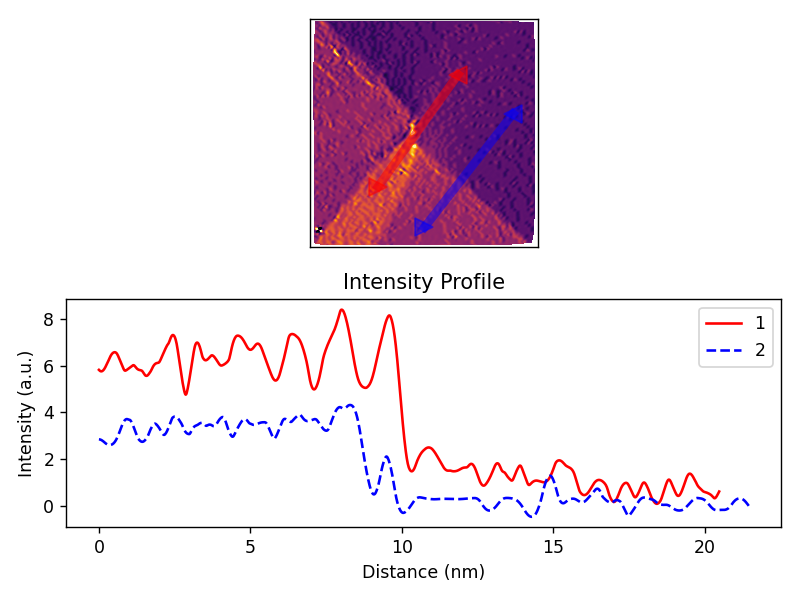

In [11]:
kwargs = {'vmin': vmin, 'vmax': vmax, 'cmap': cmap}

tml.compare_images_line_profile_one_image(rotation_map, line_profile_positions,
                                      linewidth=100, arrow='h', linetrace=0.05,
                                      **kwargs)


### c/a Ratio Map

<IPython.core.display.Javascript object>


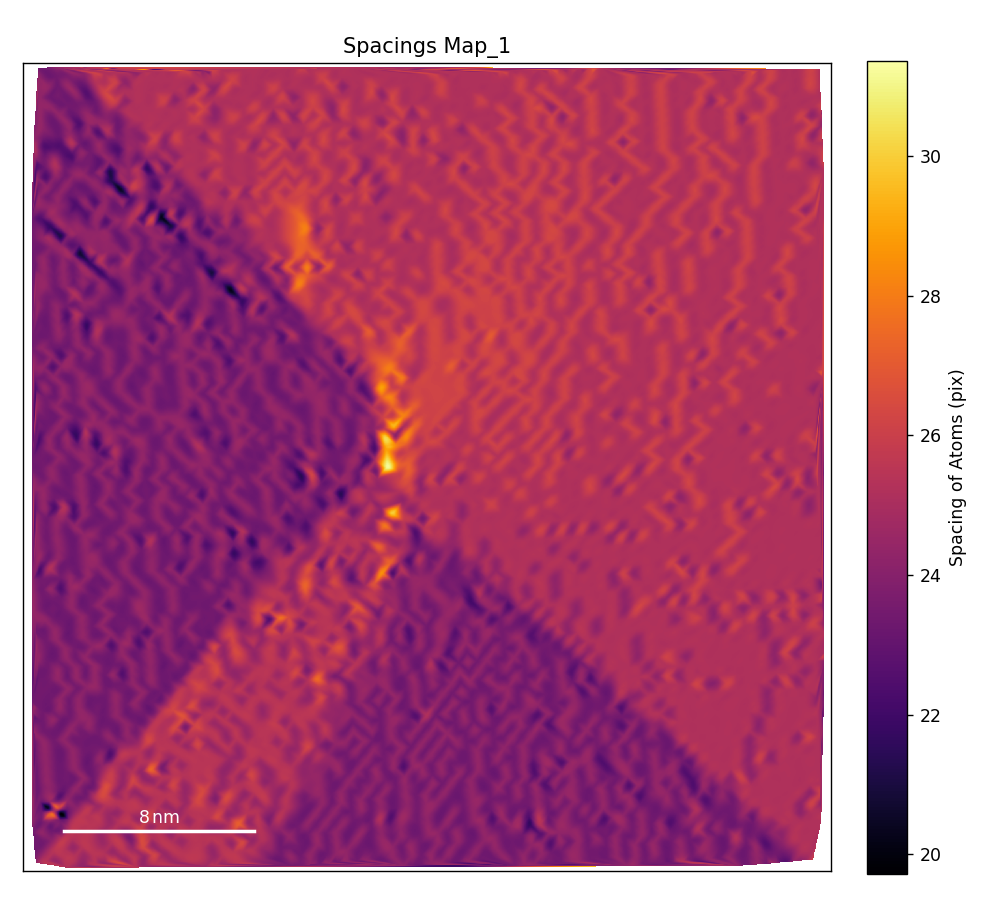

<IPython.core.display.Javascript object>


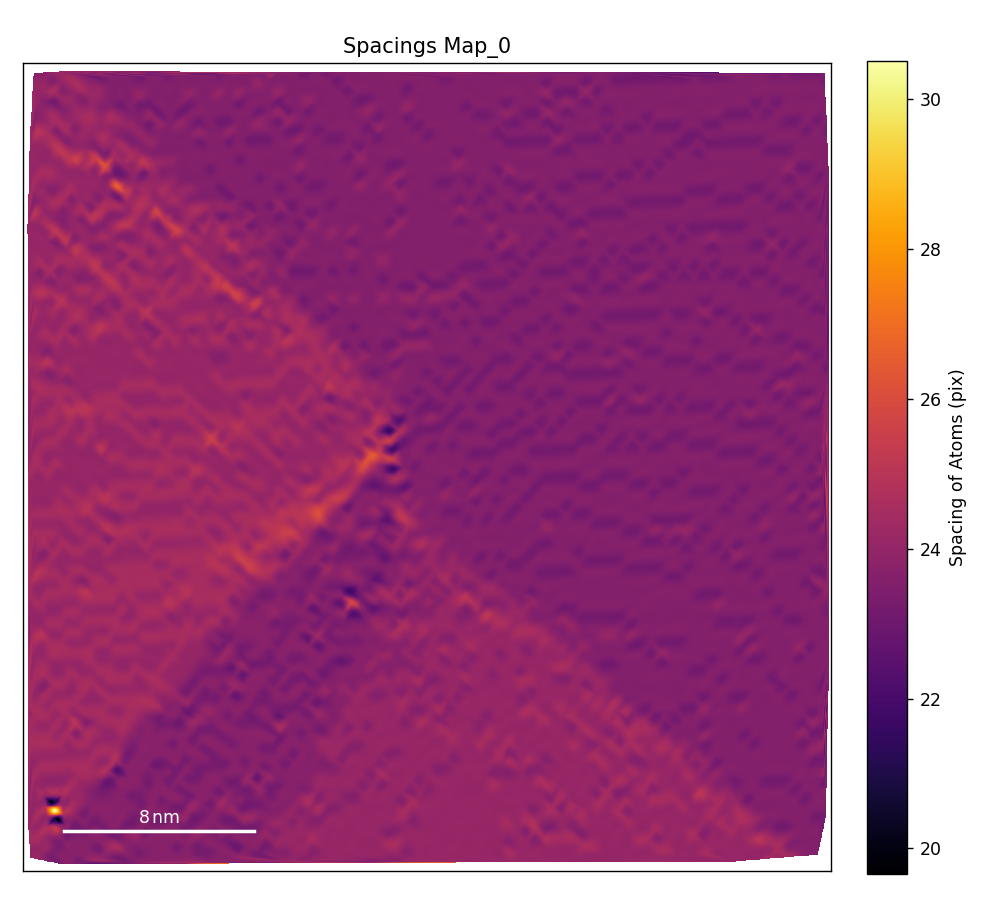

<IPython.core.display.Javascript object>


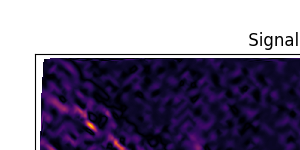

<IPython.core.display.Javascript object>


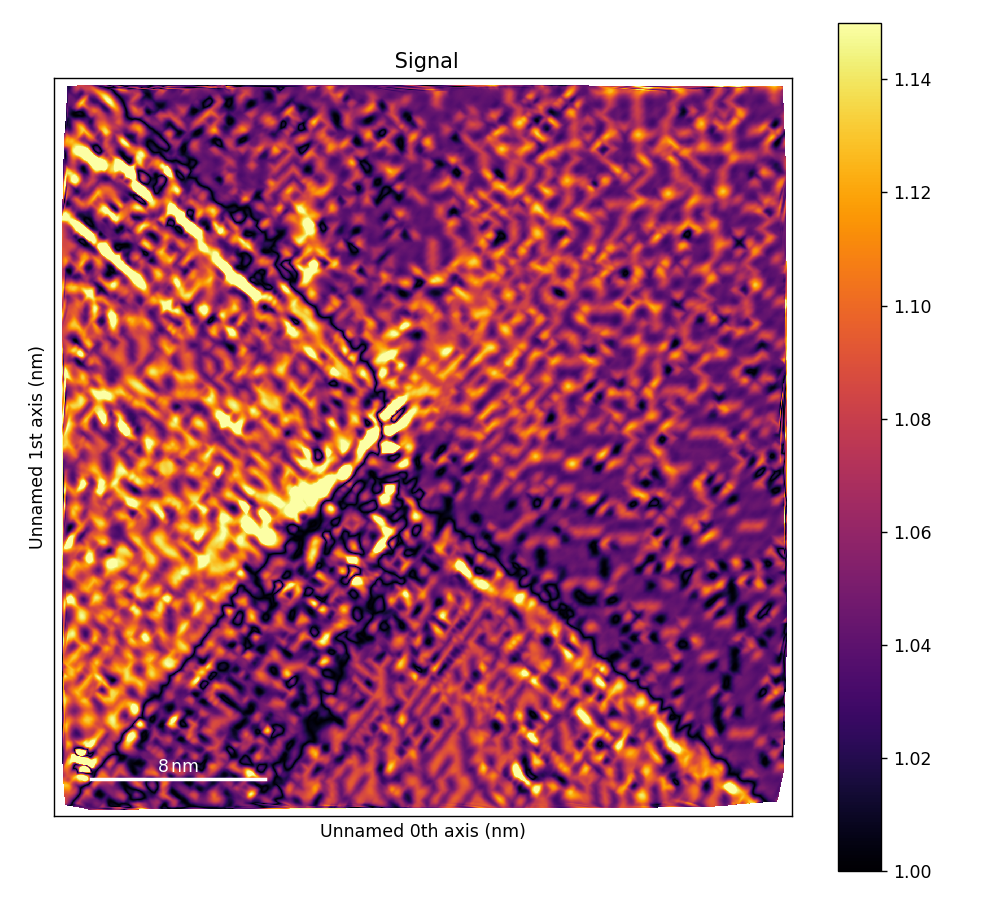

In [12]:
# Now plot the c/a ratio map of the Pb Sublattice

vmin = 1
vmax = 1.15
cmap = 'inferno'
ideal_ratio_one = True  # values under 1 will be divided by themselves

ca_ratio_map = tml.ratio_of_lattice_spacings(
    sublattice1, zone_vector_index_B,
    zone_vector_index_A, ideal_ratio_one, sampling=sampling,
    units=units, cmap=cmap)

ca_ratio_map.plot(vmin=vmin, vmax=vmax, cmap=cmap)


<IPython.core.display.Javascript object>


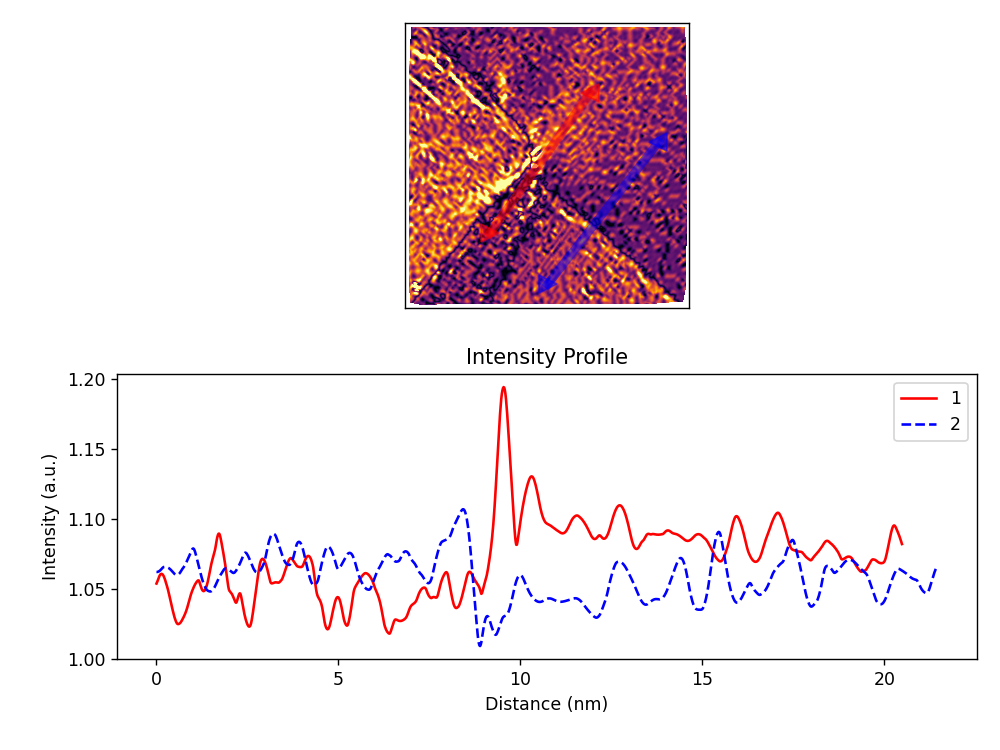

In [13]:
kwargs = {'vmin': vmin, 'vmax': vmax, 'cmap': cmap}

tml.compare_images_line_profile_one_image(ca_ratio_map, line_profile_positions,
                                      linewidth=100, arrow='h', linetrace=0.05,
                                      **kwargs)


## Polarisation Mapping

In this case, the PTO structure near the junction is highly strained. Therefore, we can't use the the Atomap get_polarization_from_second_sublattice function.

In [14]:
atom_positions_actual = np.array([sublattice2.x_position, sublattice2.y_position]).T
atom_positions_ideal = np.load('atom_positions_orig_2.npy')

u, v = tml.find_polarisation_vectors(
    atom_positions_actual, atom_positions_ideal)
x, y = atom_positions_actual.T.tolist()

<IPython.core.display.Javascript object>


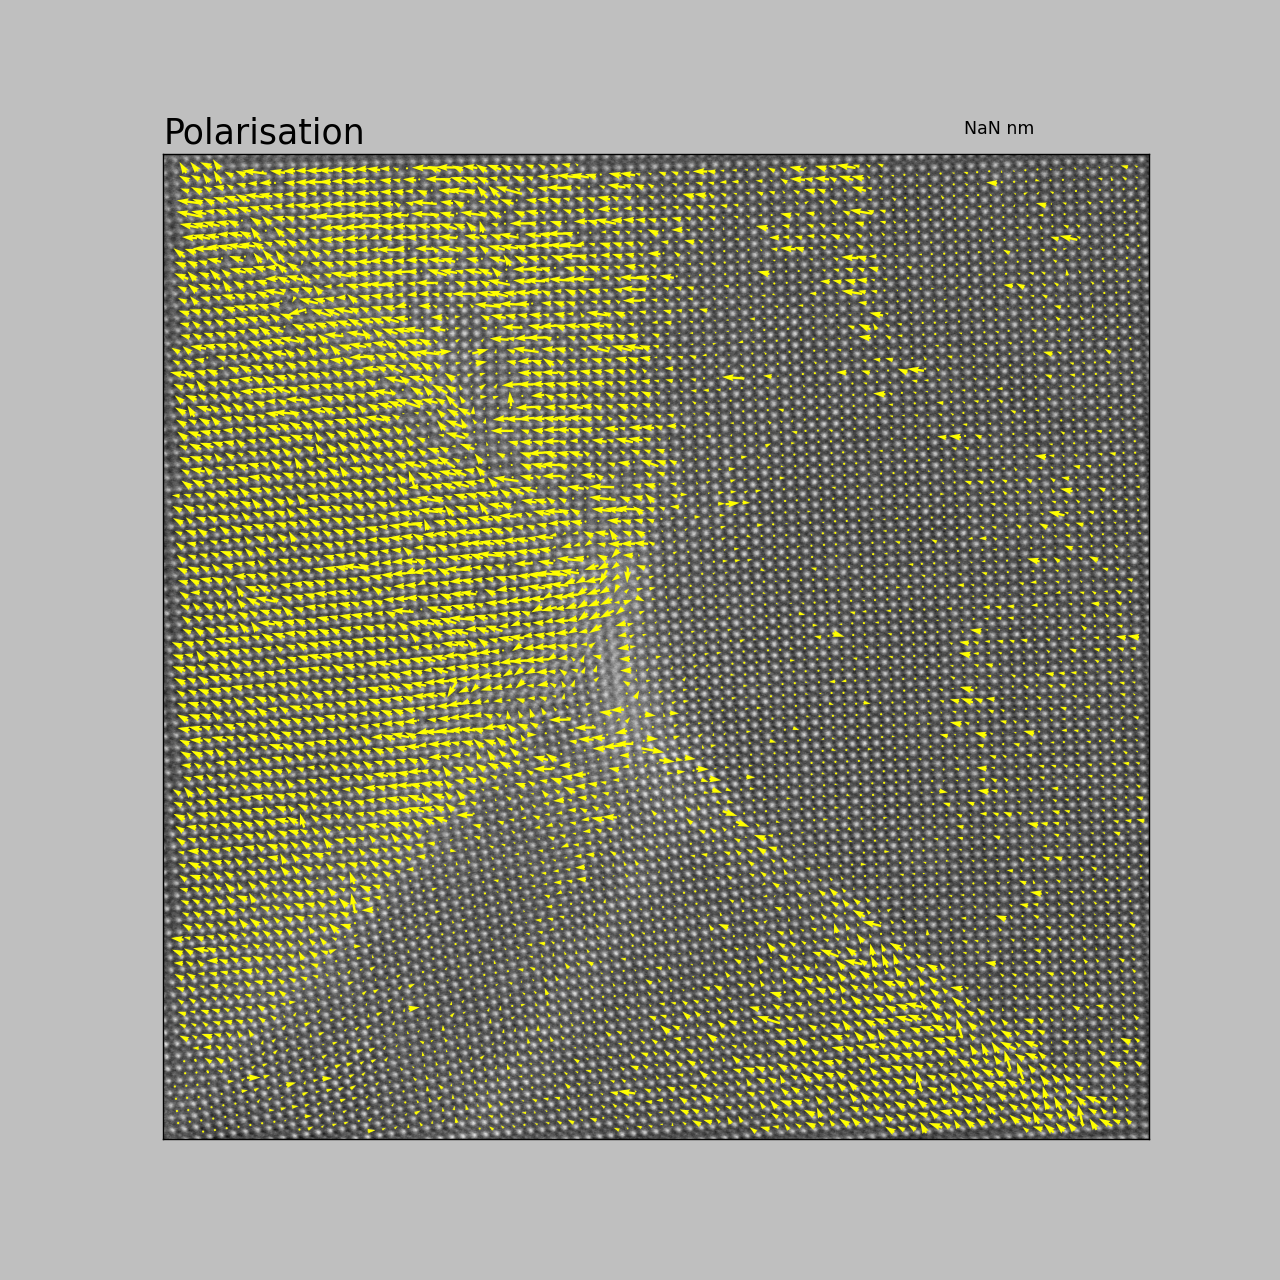

c:\users\eoconne\documents\admin documents and personal\ul_work\temul-toolkit\temul_dev_repo\temul\topotem\polarisation.py:575: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "frameon" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname=save + '_' + plot_style + '.png',
c:\users\eoconne\documents\admin documents and personal\ul_work\temul-toolkit\temul_dev_repo\temul\topotem\polarisation.py:575: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "labels" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(fname=save + '_' + plot_style + '.png',


<AxesSubplot:title={'left':'Polarisation'}>

In [15]:
# Plot the polarisation vectors (zoom in to get a better look, the top left is
# off zone)
plt.style.use("grayscale")
tml.plot_polarisation_vectors(
    x=x, y=y, u=u, v=v, image=image.data,
    sampling=sampling, units=units, unit_vector=False, overlay=True,
    color='yellow', plot_style='vector', title='Polarisation',
    monitor_dpi=250, save='Polarisation_magnitude')

<IPython.core.display.Javascript object>


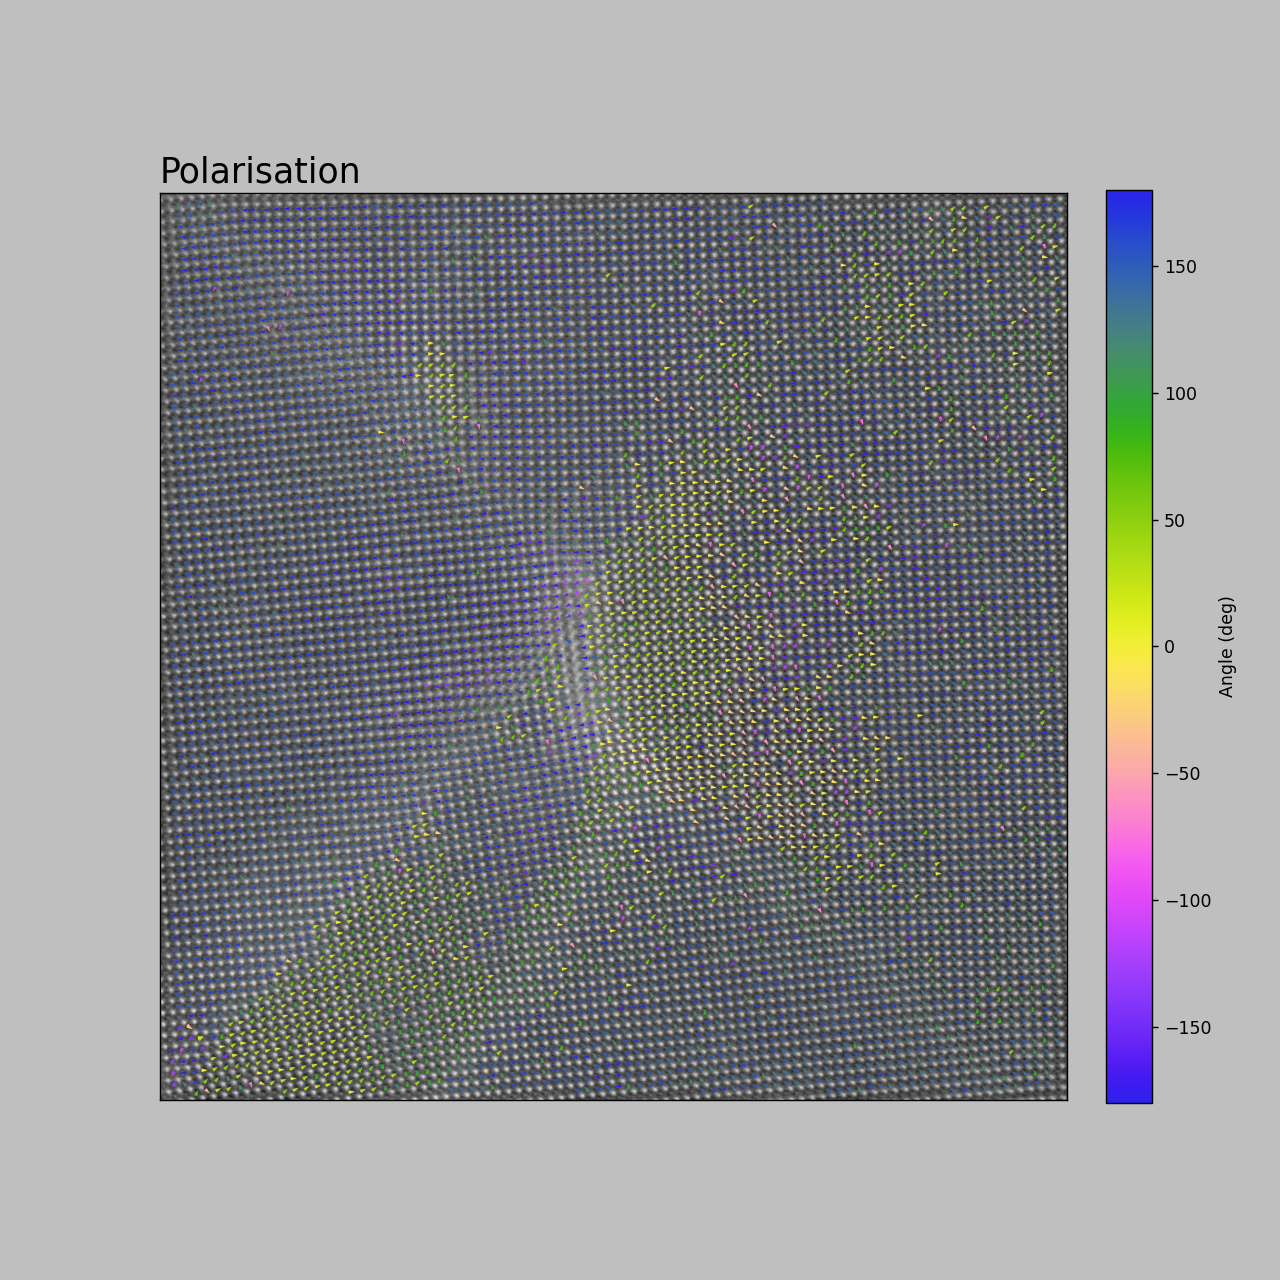

<AxesSubplot:title={'left':'Polarisation'}>

In [16]:
# Plot the angle information as a colorwheel
tml.plot_polarisation_vectors(
    x=x, y=y, u=u, v=v, image=image.data, save='Polarisation_angle',
    sampling=sampling, units=units, unit_vector=True, overlay=True,
    color='yellow', plot_style='colorwheel', title='Polarisation',
    monitor_dpi=250, vector_rep='angle', degrees=True)